In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_8.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/04/2020 19:48:52 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 19:48:53 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 19:48:53 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 19:48:54 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/04/2020 19:48:55 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

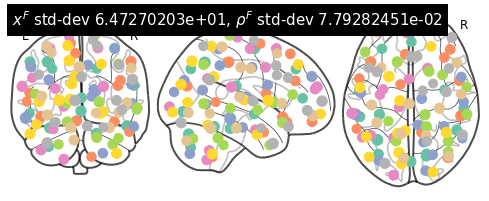

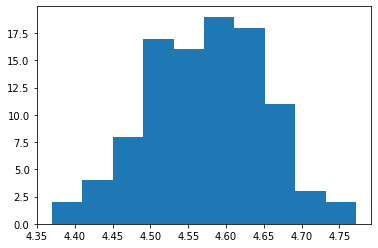

(<nilearn.plotting.displays.OrthoProjector at 0x7f7d232eb8d0>,
 tensor([[-32.1236, -31.3097, -23.4887],
         [ 36.3792,  -5.6146,  60.4437],
         [ 49.2279, -48.0969, -21.5519],
         [-34.2985, -58.0877,  45.9774],
         [-29.5454,  37.6894,  38.8785],
         [  1.5011,  44.9285,   8.2222],
         [  0.8359, -80.9598,  -5.7473],
         [ 17.4082, -72.7736,  39.0876],
         [-52.7570, -33.7133,  45.9626],
         [ 56.6079, -24.9679,  21.2875],
         [-53.4324,  -6.1790,  -8.2825],
         [ 17.1281, -75.0860, -29.3509],
         [-33.1167, -72.9975, -43.2247],
         [ 36.0396,  28.5312, -16.9824],
         [-10.0303,   0.2693,  65.8088],
         [ -5.0010,  31.9306,  55.0289],
         [ 39.7550, -76.7221,  21.0835],
         [ 42.3387,  37.0498,  26.5948],
         [ 11.8771, -50.2454, -53.7799],
         [-56.2872, -46.5280,   4.2512],
         [ 51.8409,   3.9641, -27.4042],
         [-41.3521,  23.9237, -11.6455],
         [ 53.4454, -32.7112,  46.4

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 19:49:58 [Epoch 1] (6134ms) Posterior free-energy 8.16822784e+09 = KL from prior 1.49167710e+07 - log-likelihood -8.15331123e+09
10/04/2020 19:49:58 Saving checkpoint...
10/04/2020 19:50:04 [Epoch 2] (6054ms) Posterior free-energy 7.95975322e+09 = KL from prior 9.98193500e+06 - log-likelihood -7.94977229e+09
10/04/2020 19:50:10 [Epoch 3] (5968ms) Posterior free-energy 7.82373171e+09 = KL from prior 6.73150200e+06 - log-likelihood -7.81699840e+09
10/04/2020 19:50:16 [Epoch 4] (5899ms) Posterior free-energy 7.71509760e+09 = KL from prior 4.92745850e+06 - log-likelihood -7.71017062e+09
10/04/2020 19:50:22 [Epoch 5] (5913ms) Posterior free-energy 7.64299622e+09 = KL from prior 3.29103600e+06 - log-likelihood -7.63970406e+09
10/04/2020 19:50:28 [Epoch 6] (5993ms) Posterior free-energy 7.58655437e+09 = KL from prior 2.36384600e+06 - log-likelihood -7.58419098e+09
10/04/2020 19:50:34 [Epoch 7] (6013ms) Posterior free-energy 7.54099405e+09 = KL from prior 1.49430950e+06 - log-likeli

Epoch   464: reducing learning rate of group 0 to 5.0000e-03.
Epoch   464: reducing learning rate of group 1 to 5.0000e-04.
Epoch   464: reducing learning rate of group 2 to 5.0000e-03.
Epoch   464: reducing learning rate of group 3 to 5.0000e-04.


10/04/2020 20:36:05 [Epoch 465] (5868ms) Posterior free-energy 5.23840307e+09 = KL from prior 1.68705338e+06 - log-likelihood -5.23671501e+09
10/04/2020 20:36:11 [Epoch 466] (5880ms) Posterior free-energy 5.20830515e+09 = KL from prior 1.68515425e+06 - log-likelihood -5.20662067e+09
10/04/2020 20:36:17 [Epoch 467] (5849ms) Posterior free-energy 5.20699290e+09 = KL from prior 1.68139638e+06 - log-likelihood -5.20531098e+09
10/04/2020 20:36:23 [Epoch 468] (5875ms) Posterior free-energy 5.20645837e+09 = KL from prior 1.68355900e+06 - log-likelihood -5.20477491e+09
10/04/2020 20:36:28 [Epoch 469] (5866ms) Posterior free-energy 5.20608000e+09 = KL from prior 1.68200212e+06 - log-likelihood -5.20439552e+09
10/04/2020 20:36:34 [Epoch 470] (5831ms) Posterior free-energy 5.20563405e+09 = KL from prior 1.68228250e+06 - log-likelihood -5.20395264e+09
10/04/2020 20:36:40 [Epoch 471] (5815ms) Posterior free-energy 5.20522496e+09 = KL from prior 1.68302600e+06 - log-likelihood -5.20354099e+09
10/04/

Epoch   690: reducing learning rate of group 0 to 2.5000e-03.
Epoch   690: reducing learning rate of group 1 to 2.5000e-04.
Epoch   690: reducing learning rate of group 2 to 2.5000e-03.
Epoch   690: reducing learning rate of group 3 to 2.5000e-04.


10/04/2020 20:58:25 [Epoch 691] (5980ms) Posterior free-energy 5.18589440e+09 = KL from prior 1.76159412e+06 - log-likelihood -5.18413312e+09
10/04/2020 20:58:31 [Epoch 692] (5959ms) Posterior free-energy 5.18367744e+09 = KL from prior 1.73639912e+06 - log-likelihood -5.18194227e+09
10/04/2020 20:58:37 [Epoch 693] (5961ms) Posterior free-energy 5.18321254e+09 = KL from prior 1.73394038e+06 - log-likelihood -5.18147994e+09
10/04/2020 20:58:43 [Epoch 694] (6070ms) Posterior free-energy 5.18319872e+09 = KL from prior 1.73216012e+06 - log-likelihood -5.18146714e+09
10/04/2020 20:58:49 [Epoch 695] (6042ms) Posterior free-energy 5.18297242e+09 = KL from prior 1.73027975e+06 - log-likelihood -5.18124237e+09
10/04/2020 20:58:55 [Epoch 696] (6054ms) Posterior free-energy 5.18303078e+09 = KL from prior 1.72807700e+06 - log-likelihood -5.18130330e+09
10/04/2020 20:59:01 [Epoch 697] (6062ms) Posterior free-energy 5.18290739e+09 = KL from prior 1.73175888e+06 - log-likelihood -5.18117581e+09
10/04/

Epoch   779: reducing learning rate of group 0 to 1.2500e-03.
Epoch   779: reducing learning rate of group 1 to 1.2500e-04.
Epoch   779: reducing learning rate of group 2 to 1.2500e-03.
Epoch   779: reducing learning rate of group 3 to 1.2500e-04.


10/04/2020 21:07:13 [Epoch 780] (6066ms) Posterior free-energy 5.18015078e+09 = KL from prior 1.74531775e+06 - log-likelihood -5.17840589e+09
10/04/2020 21:07:19 [Epoch 781] (6089ms) Posterior free-energy 5.18003763e+09 = KL from prior 1.73912500e+06 - log-likelihood -5.17829734e+09
10/04/2020 21:07:25 [Epoch 782] (6057ms) Posterior free-energy 5.17990093e+09 = KL from prior 1.73836625e+06 - log-likelihood -5.17816166e+09
10/04/2020 21:07:32 [Epoch 783] (6052ms) Posterior free-energy 5.17976166e+09 = KL from prior 1.73392088e+06 - log-likelihood -5.17802752e+09
10/04/2020 21:07:38 [Epoch 784] (6034ms) Posterior free-energy 5.17970074e+09 = KL from prior 1.73168375e+06 - log-likelihood -5.17796762e+09
10/04/2020 21:07:44 [Epoch 785] (6063ms) Posterior free-energy 5.17962598e+09 = KL from prior 1.73383525e+06 - log-likelihood -5.17789286e+09
10/04/2020 21:07:50 [Epoch 786] (6012ms) Posterior free-energy 5.17974374e+09 = KL from prior 1.73426100e+06 - log-likelihood -5.17800960e+09
10/04/

Epoch   812: reducing learning rate of group 0 to 6.2500e-04.
Epoch   812: reducing learning rate of group 1 to 6.2500e-05.
Epoch   812: reducing learning rate of group 2 to 6.2500e-04.
Epoch   812: reducing learning rate of group 3 to 6.2500e-05.


10/04/2020 21:10:29 [Epoch 813] (5865ms) Posterior free-energy 5.17918054e+09 = KL from prior 1.73343400e+06 - log-likelihood -5.17744640e+09
10/04/2020 21:10:35 [Epoch 814] (5892ms) Posterior free-energy 5.17907405e+09 = KL from prior 1.73119850e+06 - log-likelihood -5.17734349e+09
10/04/2020 21:10:40 [Epoch 815] (5880ms) Posterior free-energy 5.17918310e+09 = KL from prior 1.73212612e+06 - log-likelihood -5.17745203e+09
10/04/2020 21:10:46 [Epoch 816] (5936ms) Posterior free-energy 5.17903872e+09 = KL from prior 1.73424412e+06 - log-likelihood -5.17730458e+09
10/04/2020 21:10:52 [Epoch 817] (5919ms) Posterior free-energy 5.17904384e+09 = KL from prior 1.73222012e+06 - log-likelihood -5.17731277e+09
10/04/2020 21:10:58 [Epoch 818] (5932ms) Posterior free-energy 5.17888256e+09 = KL from prior 1.73434238e+06 - log-likelihood -5.17714790e+09
10/04/2020 21:11:04 [Epoch 819] (5914ms) Posterior free-energy 5.17894349e+09 = KL from prior 1.73329700e+06 - log-likelihood -5.17721037e+09
10/04/

Epoch   839: reducing learning rate of group 0 to 3.1250e-04.
Epoch   839: reducing learning rate of group 1 to 3.1250e-05.
Epoch   839: reducing learning rate of group 2 to 3.1250e-04.
Epoch   839: reducing learning rate of group 3 to 3.1250e-05.


10/04/2020 21:13:08 [Epoch 840] (5884ms) Posterior free-energy 5.17884006e+09 = KL from prior 1.73455500e+06 - log-likelihood -5.17710541e+09
10/04/2020 21:13:14 [Epoch 841] (5876ms) Posterior free-energy 5.17870438e+09 = KL from prior 1.73435600e+06 - log-likelihood -5.17697024e+09
10/04/2020 21:13:20 [Epoch 842] (5895ms) Posterior free-energy 5.17876992e+09 = KL from prior 1.73131900e+06 - log-likelihood -5.17703834e+09
10/04/2020 21:13:26 [Epoch 843] (5855ms) Posterior free-energy 5.17872230e+09 = KL from prior 1.73446175e+06 - log-likelihood -5.17698765e+09
10/04/2020 21:13:32 [Epoch 844] (5923ms) Posterior free-energy 5.17868083e+09 = KL from prior 1.73041762e+06 - log-likelihood -5.17694976e+09
10/04/2020 21:13:38 [Epoch 845] (5883ms) Posterior free-energy 5.17867878e+09 = KL from prior 1.73115862e+06 - log-likelihood -5.17694771e+09
10/04/2020 21:13:43 [Epoch 846] (5891ms) Posterior free-energy 5.17870694e+09 = KL from prior 1.73215088e+06 - log-likelihood -5.17697382e+09
10/04/

Epoch   860: reducing learning rate of group 0 to 1.5625e-04.
Epoch   860: reducing learning rate of group 1 to 1.5625e-05.
Epoch   860: reducing learning rate of group 2 to 1.5625e-04.
Epoch   860: reducing learning rate of group 3 to 1.5625e-05.


10/04/2020 21:15:13 [Epoch 861] (5965ms) Posterior free-energy 5.17863014e+09 = KL from prior 1.73282788e+06 - log-likelihood -5.17689651e+09
10/04/2020 21:15:19 [Epoch 862] (5984ms) Posterior free-energy 5.17862707e+09 = KL from prior 1.73021025e+06 - log-likelihood -5.17689600e+09
10/04/2020 21:15:25 [Epoch 863] (5961ms) Posterior free-energy 5.17861376e+09 = KL from prior 1.73644625e+06 - log-likelihood -5.17687757e+09
10/04/2020 21:15:31 [Epoch 864] (5963ms) Posterior free-energy 5.17871821e+09 = KL from prior 1.72962888e+06 - log-likelihood -5.17698816e+09
10/04/2020 21:15:37 [Epoch 865] (5972ms) Posterior free-energy 5.17850266e+09 = KL from prior 1.73353125e+06 - log-likelihood -5.17676954e+09
10/04/2020 21:15:43 [Epoch 866] (5961ms) Posterior free-energy 5.17867520e+09 = KL from prior 1.73425775e+06 - log-likelihood -5.17694003e+09
10/04/2020 21:15:49 [Epoch 867] (5974ms) Posterior free-energy 5.17861069e+09 = KL from prior 1.73236375e+06 - log-likelihood -5.17687859e+09
10/04/

Epoch   896: reducing learning rate of group 0 to 7.8125e-05.
Epoch   896: reducing learning rate of group 1 to 1.0000e-05.
Epoch   896: reducing learning rate of group 2 to 7.8125e-05.
Epoch   896: reducing learning rate of group 3 to 1.0000e-05.


10/04/2020 21:18:47 [Epoch 897] (5939ms) Posterior free-energy 5.17843814e+09 = KL from prior 1.73258475e+06 - log-likelihood -5.17670605e+09
10/04/2020 21:18:53 [Epoch 898] (5936ms) Posterior free-energy 5.17856410e+09 = KL from prior 1.73458050e+06 - log-likelihood -5.17682893e+09
10/04/2020 21:18:59 [Epoch 899] (5940ms) Posterior free-energy 5.17842534e+09 = KL from prior 1.73428362e+06 - log-likelihood -5.17669069e+09
10/04/2020 21:19:05 [Epoch 900] (5937ms) Posterior free-energy 5.17852314e+09 = KL from prior 1.73315838e+06 - log-likelihood -5.17678950e+09
10/04/2020 21:19:11 [Epoch 901] (5971ms) Posterior free-energy 5.17855078e+09 = KL from prior 1.73620825e+06 - log-likelihood -5.17681613e+09
10/04/2020 21:19:11 Saving checkpoint...
10/04/2020 21:19:17 [Epoch 902] (5935ms) Posterior free-energy 5.17849856e+09 = KL from prior 1.73667138e+06 - log-likelihood -5.17676288e+09
10/04/2020 21:19:23 [Epoch 903] (5939ms) Posterior free-energy 5.17850982e+09 = KL from prior 1.73190462e+0

Epoch   917: reducing learning rate of group 0 to 3.9063e-05.
Epoch   917: reducing learning rate of group 2 to 3.9063e-05.


10/04/2020 21:20:52 [Epoch 918] (5967ms) Posterior free-energy 5.17848678e+09 = KL from prior 1.73515538e+06 - log-likelihood -5.17675110e+09
10/04/2020 21:20:58 [Epoch 919] (5981ms) Posterior free-energy 5.17846118e+09 = KL from prior 1.73364938e+06 - log-likelihood -5.17672806e+09
10/04/2020 21:21:04 [Epoch 920] (5961ms) Posterior free-energy 5.17846886e+09 = KL from prior 1.73326362e+06 - log-likelihood -5.17673523e+09
10/04/2020 21:21:10 [Epoch 921] (5962ms) Posterior free-energy 5.17848525e+09 = KL from prior 1.73259612e+06 - log-likelihood -5.17675110e+09
10/04/2020 21:21:16 [Epoch 922] (5972ms) Posterior free-energy 5.17844685e+09 = KL from prior 1.73229325e+06 - log-likelihood -5.17671424e+09
10/04/2020 21:21:22 [Epoch 923] (5945ms) Posterior free-energy 5.17845862e+09 = KL from prior 1.73345038e+06 - log-likelihood -5.17672397e+09
10/04/2020 21:21:28 [Epoch 924] (5964ms) Posterior free-energy 5.17844838e+09 = KL from prior 1.73788225e+06 - log-likelihood -5.17671117e+09
10/04/

Epoch   938: reducing learning rate of group 0 to 1.9531e-05.
Epoch   938: reducing learning rate of group 2 to 1.9531e-05.


10/04/2020 21:22:57 [Epoch 939] (5931ms) Posterior free-energy 5.17837056e+09 = KL from prior 1.73106662e+06 - log-likelihood -5.17663949e+09
10/04/2020 21:23:03 [Epoch 940] (5945ms) Posterior free-energy 5.17836595e+09 = KL from prior 1.73304912e+06 - log-likelihood -5.17663334e+09
10/04/2020 21:23:09 [Epoch 941] (5933ms) Posterior free-energy 5.17836032e+09 = KL from prior 1.73412500e+06 - log-likelihood -5.17662669e+09
10/04/2020 21:23:15 [Epoch 942] (5933ms) Posterior free-energy 5.17841869e+09 = KL from prior 1.73085862e+06 - log-likelihood -5.17668762e+09
10/04/2020 21:23:21 [Epoch 943] (5978ms) Posterior free-energy 5.17839770e+09 = KL from prior 1.73126975e+06 - log-likelihood -5.17666611e+09
10/04/2020 21:23:27 [Epoch 944] (5965ms) Posterior free-energy 5.17844838e+09 = KL from prior 1.73564988e+06 - log-likelihood -5.17671219e+09
10/04/2020 21:23:33 [Epoch 945] (5973ms) Posterior free-energy 5.17832499e+09 = KL from prior 1.73519550e+06 - log-likelihood -5.17659034e+09
10/04/

Epoch   959: reducing learning rate of group 0 to 1.0000e-05.
Epoch   959: reducing learning rate of group 2 to 1.0000e-05.


10/04/2020 21:25:02 [Epoch 960] (5941ms) Posterior free-energy 5.17842995e+09 = KL from prior 1.73080612e+06 - log-likelihood -5.17669990e+09
10/04/2020 21:25:08 [Epoch 961] (5936ms) Posterior free-energy 5.17836083e+09 = KL from prior 1.73627662e+06 - log-likelihood -5.17662362e+09
10/04/2020 21:25:14 [Epoch 962] (5937ms) Posterior free-energy 5.17838029e+09 = KL from prior 1.73373738e+06 - log-likelihood -5.17664563e+09
10/04/2020 21:25:20 [Epoch 963] (5897ms) Posterior free-energy 5.17839616e+09 = KL from prior 1.73324525e+06 - log-likelihood -5.17666304e+09
10/04/2020 21:25:26 [Epoch 964] (5910ms) Posterior free-energy 5.17844890e+09 = KL from prior 1.73095262e+06 - log-likelihood -5.17671680e+09
10/04/2020 21:25:32 [Epoch 965] (5944ms) Posterior free-energy 5.17836954e+09 = KL from prior 1.73247475e+06 - log-likelihood -5.17663795e+09
10/04/2020 21:25:38 [Epoch 966] (5922ms) Posterior free-energy 5.17848576e+09 = KL from prior 1.73015475e+06 - log-likelihood -5.17675520e+09
10/04/

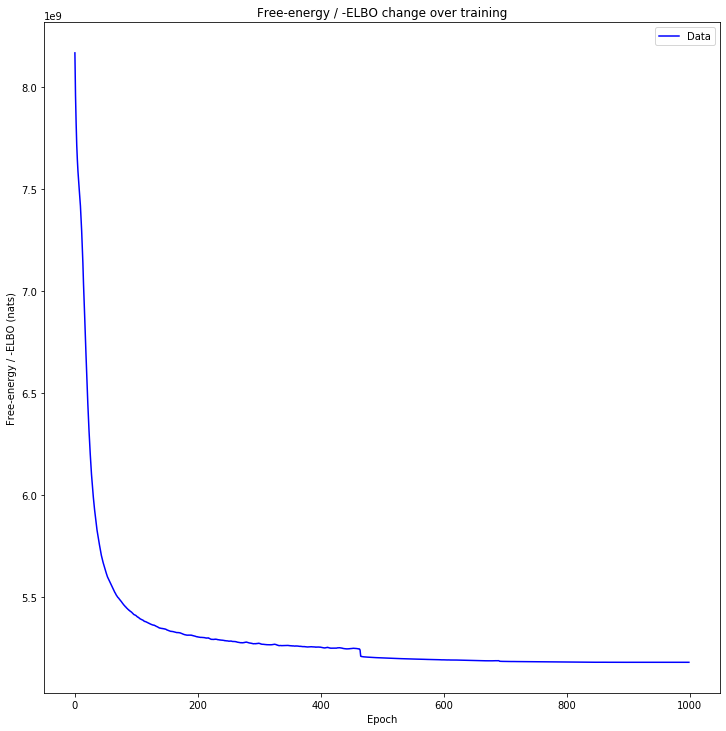

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/04/2020 21:29:01 [Epoch 1] (690ms) Posterior free-energy 1.24825677e+09 = KL from prior 9.80448750e+04 - log-likelihood -1.24815872e+09
10/04/2020 21:29:01 Saving checkpoint...
10/04/2020 21:29:02 [Epoch 2] (697ms) Posterior free-energy 1.22396954e+09 = KL from prior 9.54987422e+04 - log-likelihood -1.22387418e+09
10/04/2020 21:29:03 [Epoch 3] (696ms) Posterior free-energy 1.19679347e+09 = KL from prior 9.07242812e+04 - log-likelihood -1.19670272e+09
10/04/2020 21:29:03 [Epoch 4] (694ms) Posterior free-energy 1.17457280e+09 = KL from prior 8.89110000e+04 - log-likelihood -1.17448384e+09
10/04/2020 21:29:04 [Epoch 5] (693ms) Posterior free-energy 1.14893939e+09 = KL from prior 8.62532578e+04 - log-likelihood -1.14885325e+09
10/04/2020 21:29:05 [Epoch 6] (693ms) Posterior free-energy 1.13454016e+09 = KL from prior 8.61605234e+04 - log-likelihood -1.13445389e+09
10/04/2020 21:29:05 [Epoch 7] (690ms) Posterior free-energy 1.10899290e+09 = KL from prior 8.48809844e+04 - log-likelihood -1

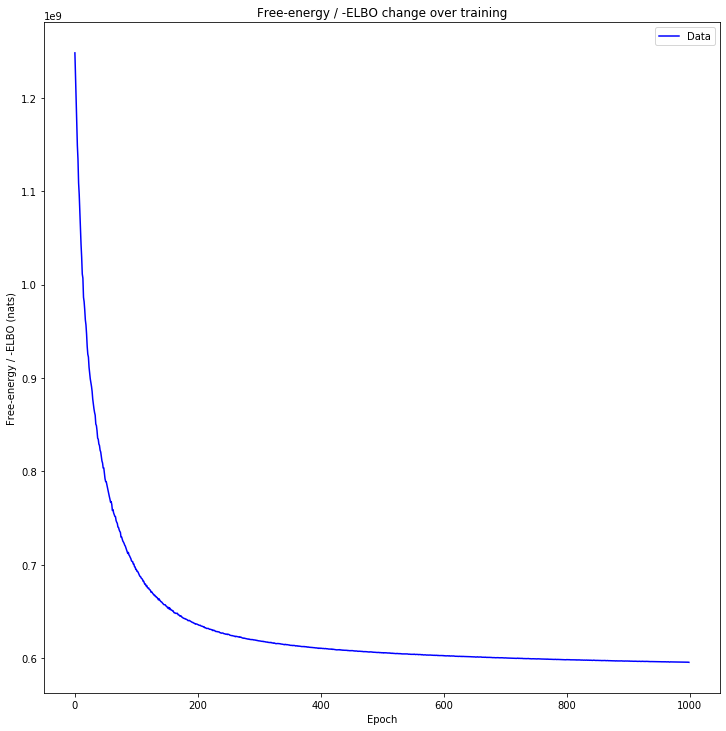

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

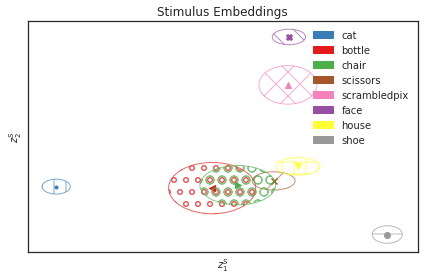

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

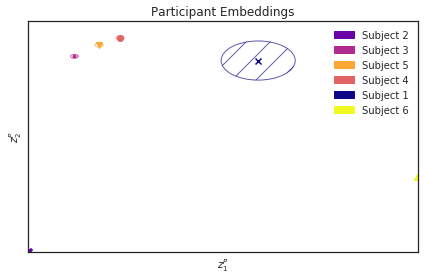

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/04/2020 21:40:36 Plotting factors for Participant 3, run 9


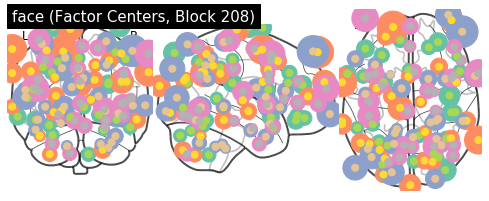

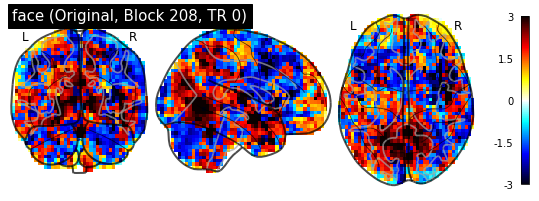

10/04/2020 21:40:39 Reconstruction Error (Frobenius Norm): 1.28702286e+02 out of 5.08276093e+02


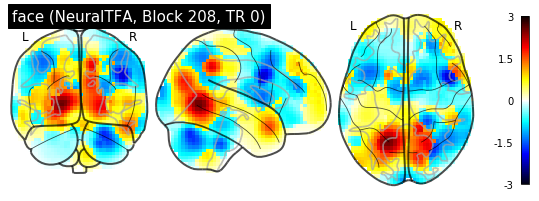

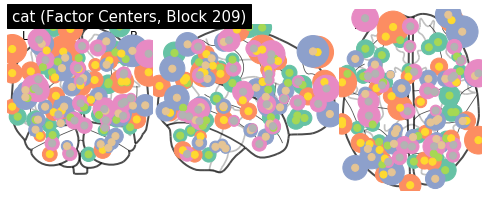

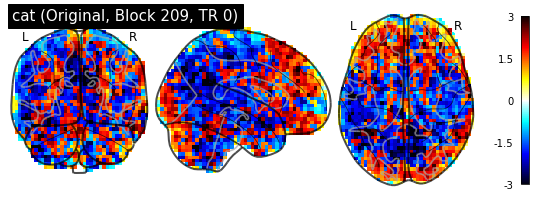

10/04/2020 21:40:42 Reconstruction Error (Frobenius Norm): 1.27673409e+02 out of 5.82565125e+02


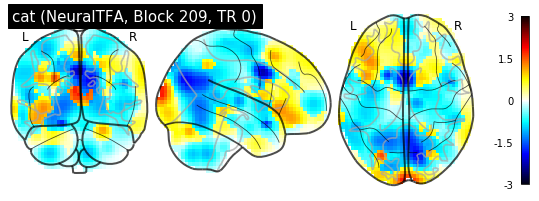

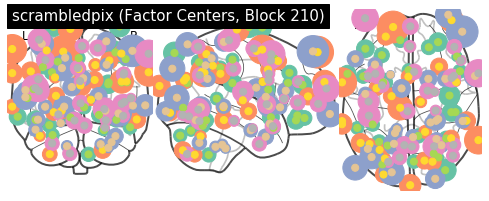

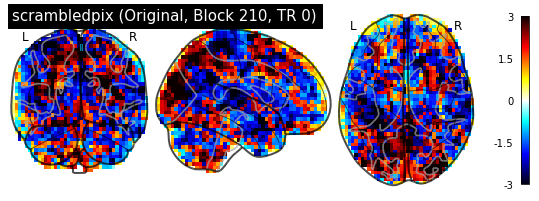

10/04/2020 21:40:44 Reconstruction Error (Frobenius Norm): 1.28386917e+02 out of 5.84564209e+02


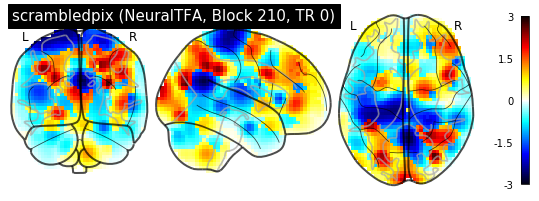

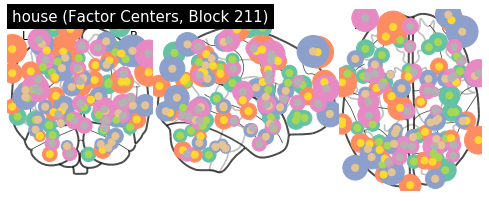

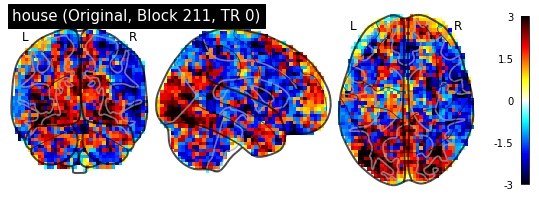

10/04/2020 21:40:47 Reconstruction Error (Frobenius Norm): 1.26203003e+02 out of 5.42854126e+02


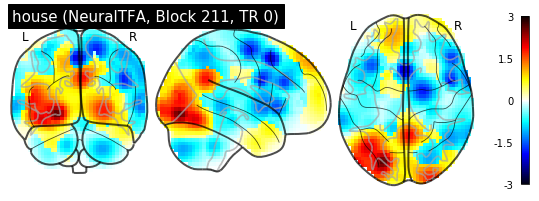

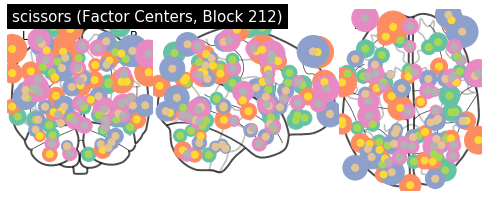

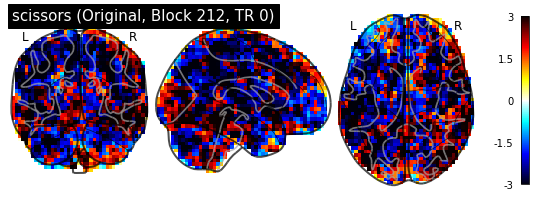

10/04/2020 21:40:50 Reconstruction Error (Frobenius Norm): 1.37442093e+02 out of 6.22377869e+02


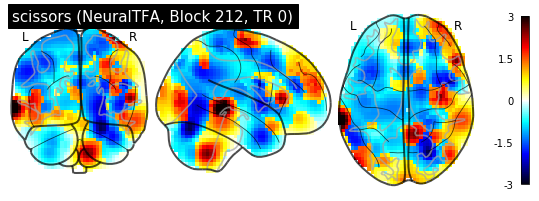

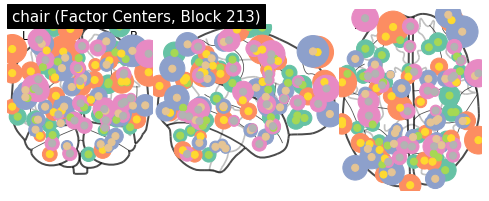

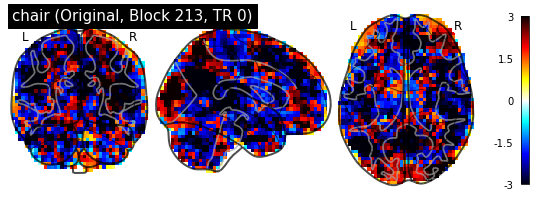

10/04/2020 21:40:53 Reconstruction Error (Frobenius Norm): 1.33946533e+02 out of 5.59548157e+02


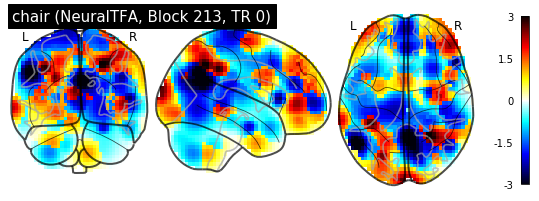

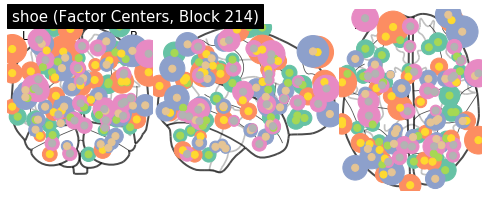

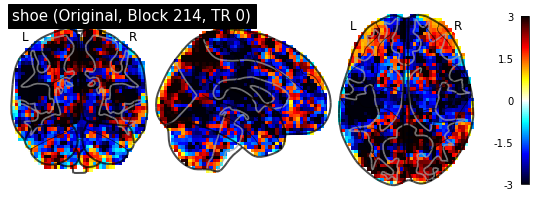

10/04/2020 21:40:56 Reconstruction Error (Frobenius Norm): 1.34907043e+02 out of 5.74876526e+02


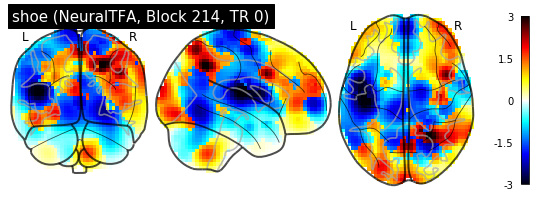

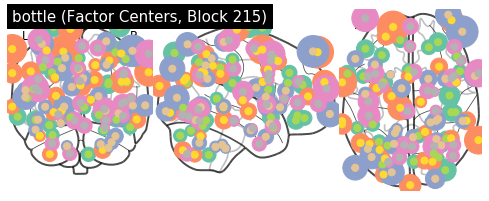

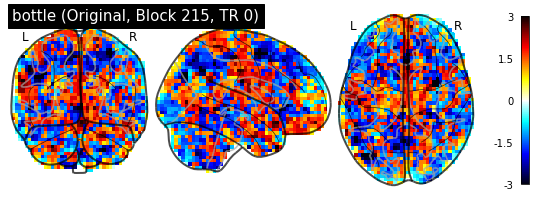

10/04/2020 21:40:59 Reconstruction Error (Frobenius Norm): 1.06166496e+02 out of 5.63066528e+02


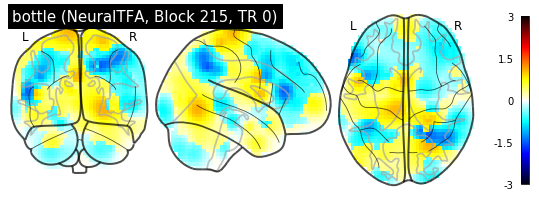

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

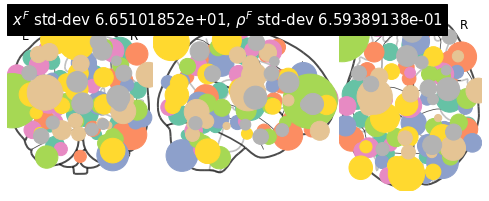

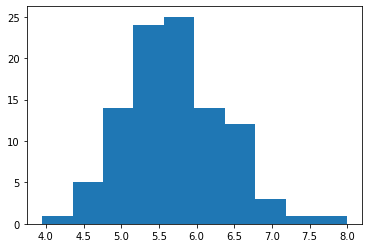

(<nilearn.plotting.displays.OrthoProjector at 0x7f7c9d9e6950>,
 tensor([[-3.1891e+01, -4.6798e+01, -2.1034e+01],
         [ 4.1760e+01, -1.4737e+01,  5.7579e+01],
         [ 4.0217e+01, -5.9686e+01, -1.9342e+01],
         [-2.9999e+01, -5.8441e+01,  4.6680e+01],
         [-2.1164e+01,  3.4374e+01,  2.7910e+01],
         [ 5.2746e+00,  4.1614e+01, -8.2397e+00],
         [-3.6298e+00, -8.5426e+01, -9.2915e+00],
         [ 1.6341e+01, -7.5994e+01,  3.5185e+01],
         [-5.1788e+01, -3.6479e+01,  4.9889e+01],
         [ 6.0844e+01, -4.2547e+01,  1.6114e+01],
         [-5.5905e+01, -1.0509e+01,  3.7164e-01],
         [ 1.7072e+01, -7.7518e+01, -3.0312e+01],
         [-2.6413e+01, -7.2450e+01, -4.2270e+01],
         [ 5.4360e+01,  2.9221e+01, -3.0634e+01],
         [-9.3861e-01,  6.3076e+00,  5.3760e+01],
         [-4.0240e+00,  1.8430e+01,  6.2146e+01],
         [ 3.2036e+01, -7.6990e+01,  3.1125e+01],
         [ 4.3110e+01,  2.3365e+01,  2.5974e+01],
         [ 9.9353e-02, -5.6239e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/04/2020 21:41:09 Average reconstruction error (MSE): 5.21794545e+02 +/- 4.14364260e+01
10/04/2020 21:41:09 Average data norm (Euclidean): 6.04956763e+02 +/- 6.18901705e+01
10/04/2020 21:41:09 Percent average reconstruction error: 86.526815 +/- 4.02196787e+00


(array([557.13458252, 532.67181396, 498.32720947, 505.83563232,
        525.98797607, 507.80996704, 510.2996521 , 486.84857178,
        555.03131104, 527.37524414, 499.42843628, 449.86825562,
        469.46621704, 487.55395508, 547.97235107, 539.20806885,
        498.93759155, 496.25369263, 468.43869019, 500.019104  ,
        477.82470703, 531.89715576, 499.496521  , 510.40982056,
        613.67297363, 547.83343506, 505.38278198, 532.56066895,
        476.40460205, 510.84259033, 513.94561768, 475.91061401,
        585.03198242, 522.69012451, 466.03765869, 492.53271484,
        530.50177002, 489.55957031, 504.3364563 , 538.99279785,
        595.85192871, 499.58721924, 496.5664978 , 519.32751465,
        525.7557373 , 508.36273193, 542.44940186, 488.69680786,
        522.64886475, 536.39501953, 483.88088989, 456.10827637,
        507.27062988, 556.72033691, 517.29699707, 550.5737915 ,
        504.79071045, 459.73703003, 409.92251587, 437.98352051,
        459.55551147, 454.69592285, 462.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[595562432.0, -595415104.0, 147307.421875],
 [595715456.0, -595299904.0, 147746.359375]]